# Introduction

### About this Data:
- The dataset contains Monte Carlo–simulated events from an atmospheric Cherenkov telescope, representing light patterns produced by high-energy particles interacting in the Earth’s atmosphere. 
- Each event is described by 10 numerical features (Hillas parameters) that characterize the shape and intensity of the recorded shower image.
- The goal is a binary classification task — to distinguish gamma-ray events (signal) from hadronic cosmic-ray events (background) based on these geometric and brightness features.
- Data set Link: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope



| Variable Name | Role    | Type       | Description                                                      | Units | Missing Values |
| ------------- | ------- | ---------- | ---------------------------------------------------------------- | ----- | -------------- |
| fLength       | Feature | Continuous | Major axis of ellipse                                            | mm    | No             |
| fWidth        | Feature | Continuous | Minor axis of ellipse                                            | mm    | No             |
| fSize         | Feature | Continuous | 10-log of sum of content of all pixels                           | #phot | No             |
| fConc         | Feature | Continuous | Ratio of sum of two highest pixels over fSize                    | —     | No             |
| fConc1        | Feature | Continuous | Ratio of highest pixel over fSize                                | —     | No             |
| fAsym         | Feature | Continuous | Distance from highest pixel to center, projected onto major axis | —     | No             |
| fM3Long       | Feature | Continuous | 3rd root of third moment along major axis                        | mm    | No             |
| fM3Trans      | Feature | Continuous | 3rd root of third moment along minor axis                        | mm    | No             |
| fAlpha        | Feature | Continuous | Angle of major axis with vector to origin                        | deg   | No             |
| fDist         | Feature | Continuous | Distance from origin to center of ellipse                        | mm    | No             |
| class         | Target  | Binary     | gamma (signal), hadron (background)                              | -     | No             | 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('/Users/venkatchandan/Desktop/ML_Projects/CosmicClassifier/Dataset/magic04.data',names = cols)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [2]:
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Histogram - Distribution per Feature per Class

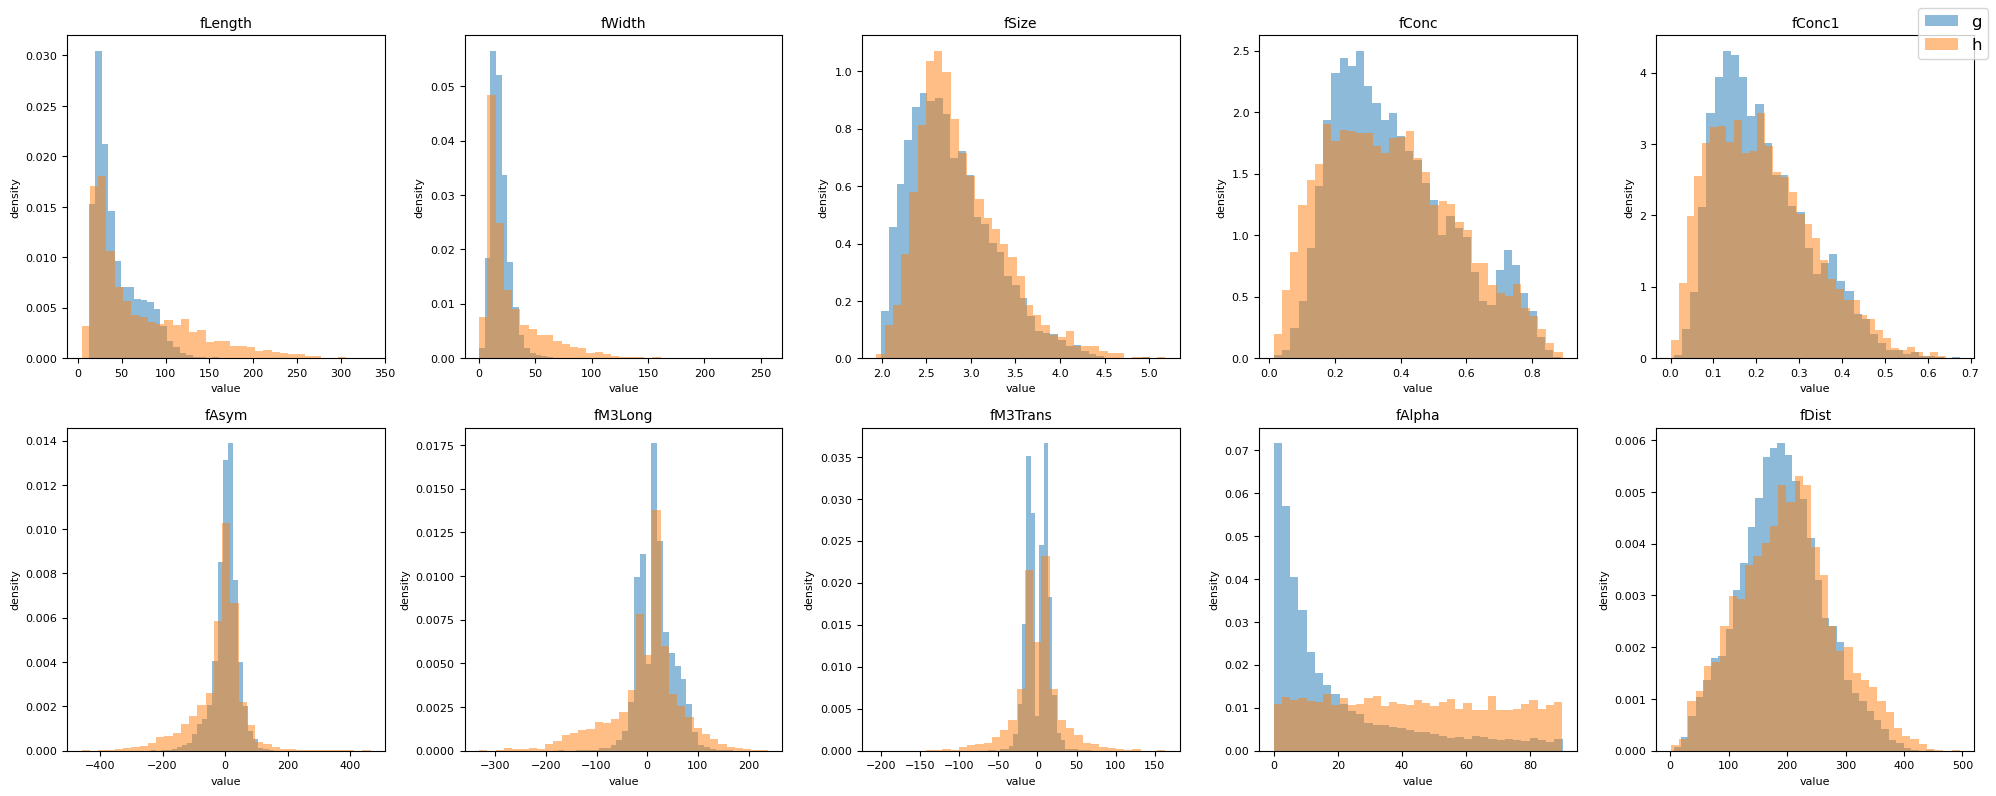

In [3]:
n_features = X.shape[1]
classes = np.unique(y_train)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()  

for i in range(n_features):
    ax = axes[i]
    for cls in classes:
        mask = (y_train == cls)
        ax.hist(
            X_train.values[mask, i],
            bins=35,
            alpha=0.5,
            density=True,
            label=f"{cls}"
        )
    
    ax.set_title(cols[i], fontsize=10)
    ax.set_xlabel("value", fontsize=8)
    ax.set_ylabel("density", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

fig.legend(classes, loc='upper right', fontsize=12)
fig.tight_layout()
plt.show()


## Gaussian Curve Grid

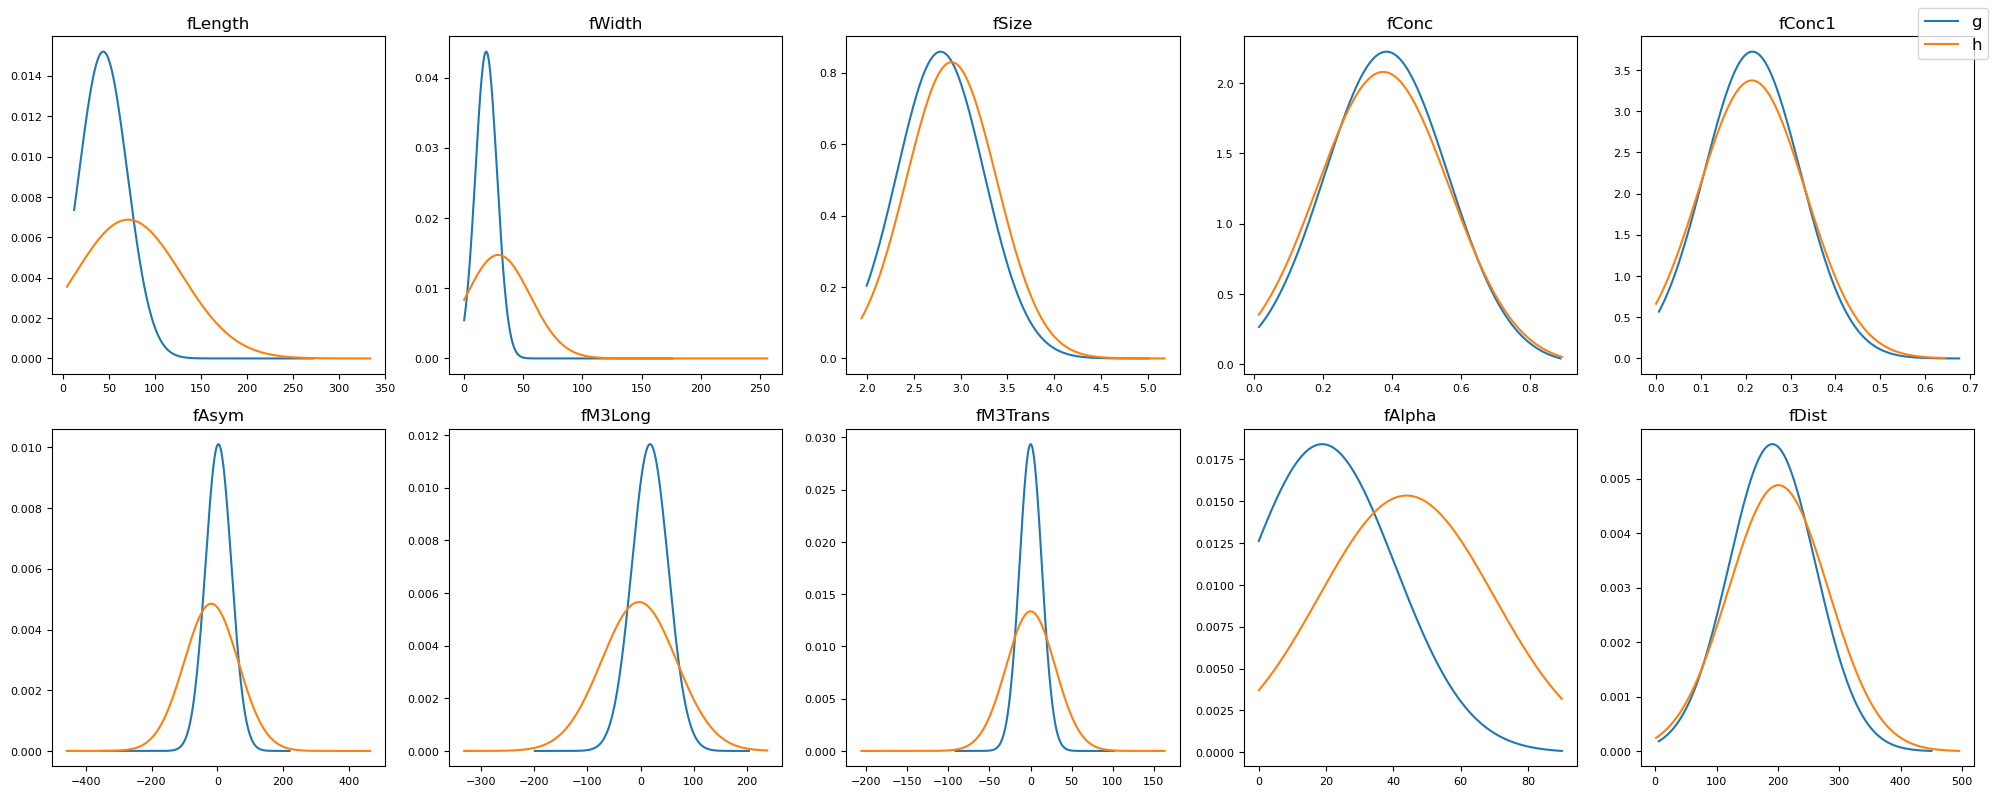

In [4]:
from scipy.stats import norm

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(n_features):
    ax = axes[i]

    for cls in classes:
        mask = (y_train == cls)
        feat = X_train.values[mask, i]
        
        mu = feat.mean()
        sigma = feat.std()

        x = np.linspace(feat.min(), feat.max(), 300)
        ax.plot(x, norm.pdf(x, mu, sigma), label=f"{cls} Gaussian", linewidth=1.5)

    ax.set_title(cols[i], fontsize=12)
    ax.tick_params(axis='both', labelsize=8)

fig.legend(classes, loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


## Scatter-Plots

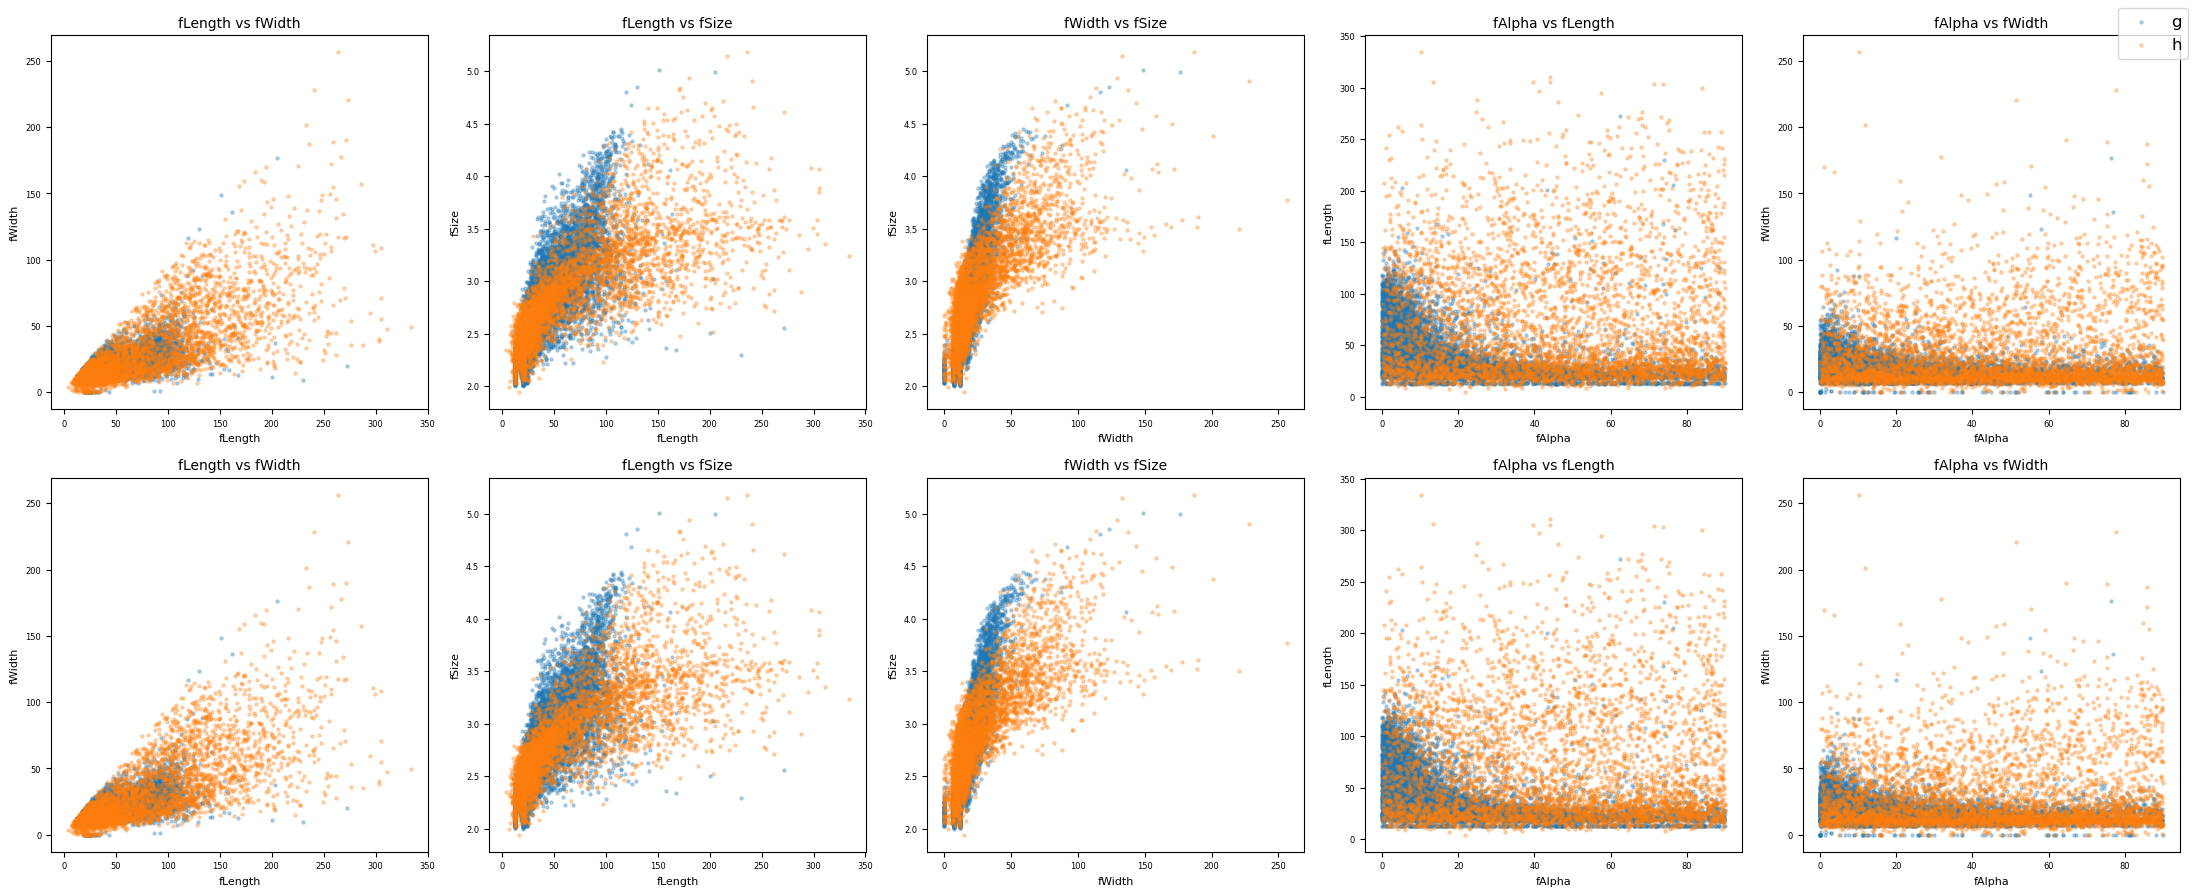

In [5]:
pairs = [(0,1), (0,2), (1,2), (8,0), (8,1)]  

fig, axes = plt.subplots(2, 5, figsize=(22, 9))
axes = axes.flatten()

for idx in range(10):           
    i, j = pairs[idx % 5]      
    ax = axes[idx]
    for cls in classes:
        mask = (y_train == cls)
        ax.scatter(
            X_train.values[mask, i],
            X_train.values[mask, j],
            s=5,
            alpha=0.3,
            label=cls
        )
    ax.set_xlabel(cols[i], fontsize=8)
    ax.set_ylabel(cols[j], fontsize=8)
    ax.set_title(f"{cols[i]} vs {cols[j]}", fontsize=10)
    ax.tick_params(axis='both', labelsize=6)

# Add ONE legend for all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()



## Correlation-Matrix

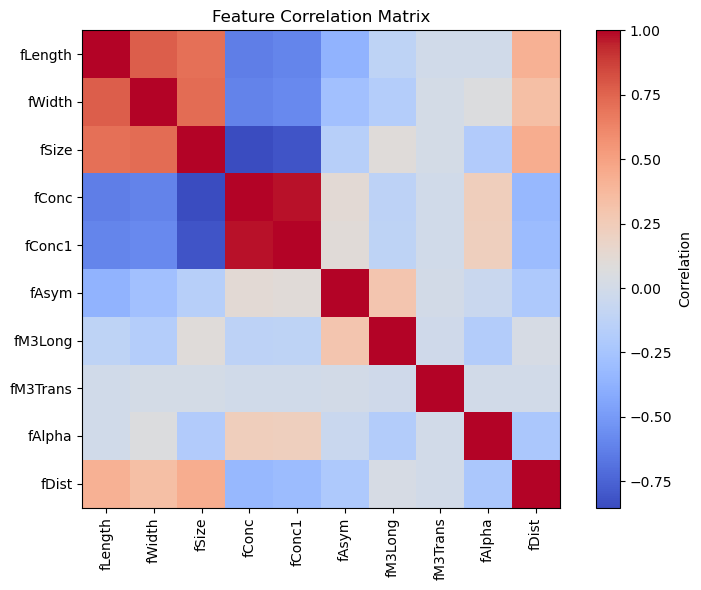

In [6]:
corr = np.corrcoef(X_train, rowvar=False)

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar(label="Correlation")
plt.xticks(range(n_features), cols[:-1], rotation=90)
plt.yticks(range(n_features), cols[:-1])
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


## PCA projection

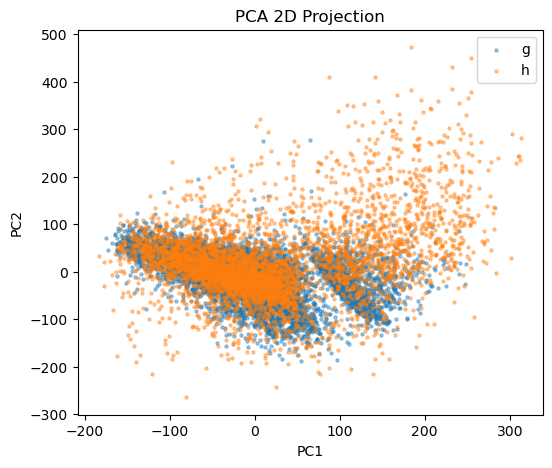

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(6,5))
for cls in classes:
    mask = (y_train == cls)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=5, alpha=0.4, label=cls)
plt.legend()
plt.title("PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Summary of these Plots

1. ### Histogram Plots:
    - fLength, fWidth:
        - Very skewed, Long Right Tailed
        - Gamma and Hydron Overlaps a Lot.
        - These Features are Not Guassian, so Guassian NB woulf struggle with these.
    - fSize: 
        - Better, can see small seperation between the 2 classes
        - Models would still Struggle sperating the classes
    - fConc, fConc1:
        - These will help all Models
    - fAsym, fM3Long, fM3Trans:
        - Almost symmetric distributions
        - Very high overlap
        - Naive Bayes over-trusts them because they “look Gaussian”
    - fDist
        - Moderate Overlap, Not Very Useful
    - Summary: 
        - Data is very skewed, GNB should Perform the Worst.
        - fAlhpa gotta be the most Important.
2. ###  Guassian Plot:
    - Naive Bayes tries to fit a bell curve, but real data is not bell-shaped
    - For many features (fLength, fWidth, fSize), the Gaussian curve does NOT match the actual histogram shape
    - fAlpha, fConc1 are moderately Gaussian → NB does okay here
    - fAsym, fM3Long look Gaussian but overlap too much → NB cannot separate
3. ### Correlation Matrix:
    - fLength, fWidth, fSize, fConc, fConc1 → all highly correlated
    - fM3Long and fM3Trans → correlated
    - fAlpha and fAsym are mostly Independent
    - Since Naive Bayes has an assumption that all the features are independent, the correlation of few features is not so good.
4. ### PCA Projection:
    - Gamma and hadron clouds overlap a lot
    - There is no sharp, clean separation
    - But gamma tends to cluster slightly more on one side
    - A curved structure exists → dataset is not linearly separable
    - Based on PCA shape, the dataset benefits from nonlinear models (SVM RBF, RF, XGBoost).
















--- 
# What these Graphs Should Mean for Each Model:
## Gaussian Naive Bayes
- Bad choice for this dataset because:
- Features are not Gaussian
- Features are strongly correlated
- Many feature distributions overlap heavily
- NB makes wrong independence assumptions
NB can’t capture the real structure → low recall/precision.
## Logistic Regression 
- Better than NB but still limited because:
- Data is not linearly separable
- Many features are skewed
- Correlation hurts LR (multicollinearity)
LR will do okay but not great.
## Support Vector Machine (RBF Kernel)
- Best suited because:
- Captures nonlinear curved boundaries
- Works well with overlapping data
- Handles correlated features
- Uses fAlpha effectively
This model will likely give best performance (80–90%+ accuracy).
## Random Forest
- Also very good because:
- No assumptions about data shape
- Handles skewed, long-tailed distributions
- Handles correlation well
- Learns nonlinear rules naturally
Good performance and interpretability.
